# Лекция 3: Распределения и операции с функцией плотности вероятности

В этой лекции мы детально познакомимся с некоторыми наиболее часто встречающимися распределениями. В ходе лекции мы будем использовать пакеты:
 - `scipy.stats` ради реализации популярных функций плотности вероятности
 - `numpy` ради эффективных векотрных вычислений
 - `pandas` ради удобной работы с многомерными данными
 - `matplotlib.pyplot` ради визуализации

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import seaborn as sns
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
%matplotlib notebook
matplotlib.rc('font', size=22)
matplotlib.rc('animation', html='html5')
bigfontsize=20
labelfontsize=16
tickfontsize=16
sns.set_context('talk')
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })




In [3]:
def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        np.random.seed(19680801)
        fd = DISTR.rvs(1000)
        data = fd[:10*frame_number]
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
#             rect.set_height(count/(10*frame_number))
            rect.set_height(count)
        return bar_container.patches
    return animate

## Дискретные распределения

Распределение дискретной случайной величины описывается **функцией вероятности (probability mass function, PMF)**

### Распределение Бернулли (Bernoulli distribution)

$$ PMF(k) = p^k(1-p)^{(1-k)},\ k\in\{0,1\}$$

Если случайная величина может принимать значения 0 или 1, то ее распрееделение является распределением Бернулли. 
Распределение имеет один параметр $p$ - вероятность принять значение 1.

In [4]:
from scipy.stats import bernoulli
p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print(mean, var, skew, kurt)

0.3 0.21 0.8728715609439694 -1.2380952380952381


<IPython.core.display.Javascript object>


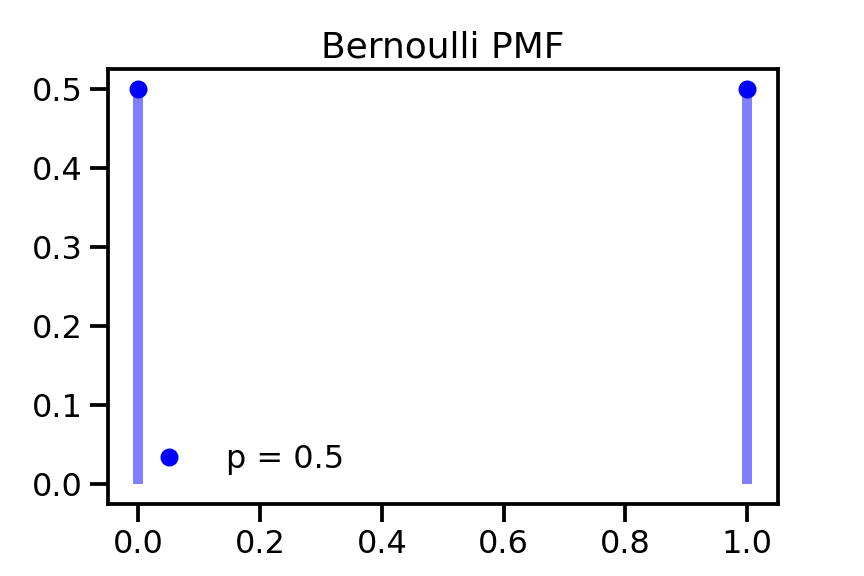

In [5]:
from scipy.stats import bernoulli
fig, ax = plt.subplots(1, 1)
p = 0.5

x = np.arange(bernoulli.ppf(0.01, p),
               bernoulli.ppf(0.99, p)+1)
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='p = '+str(p))
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
plt.title("Bernoulli PMF")
ax.legend(loc='best', frameon=False)
plt.show()

<IPython.core.display.Javascript object>


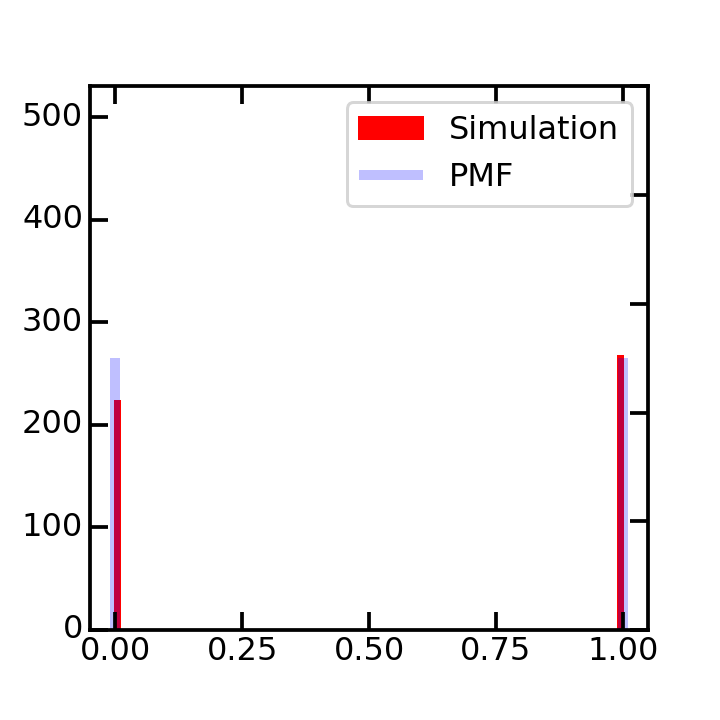

In [6]:
HIST_BINS = np.linspace(0, 1, 100)
DISTR = bernoulli(0.5)
data = DISTR.rvs(1000)
max_pdf = 1

fig = plt.figure(figsize = (5,5))
host = host_subplot(111, axes_class=AA.Axes)
par1 = host.twinx()
par1.set_ylim(top = max_pdf)

x = np.arange(DISTR.ppf(0.01),
               DISTR.ppf(0.99)+1)

par1.vlines(x, 0, DISTR.pmf(x), colors='b', lw=5, alpha=0.25,label='PMF')

n, _ = np.histogram(data, HIST_BINS)
_, _, bar_container = host.hist(data, HIST_BINS, lw=1,
                              ec="red", fc="red", alpha=1, label='Simulation')
plt.legend()
# 
# host.set_ylim(top=1)  # set safe limit to ensure that all data is visible.
ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()

### Биномиальное расределение (Binomial distribution)

$$ PMF(k) = \binom{n}{k} p^kq^{n-k} $$

Сумма выборки размера n полученной из распределения Бернулли распределена биномиально.

In [7]:
from scipy.stats import binom
p = 0.7
n = 100
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print(mean, var, skew, kurt)

70.0 21.000000000000004 -0.08728715609439693 -0.01238095238095238


<IPython.core.display.Javascript object>


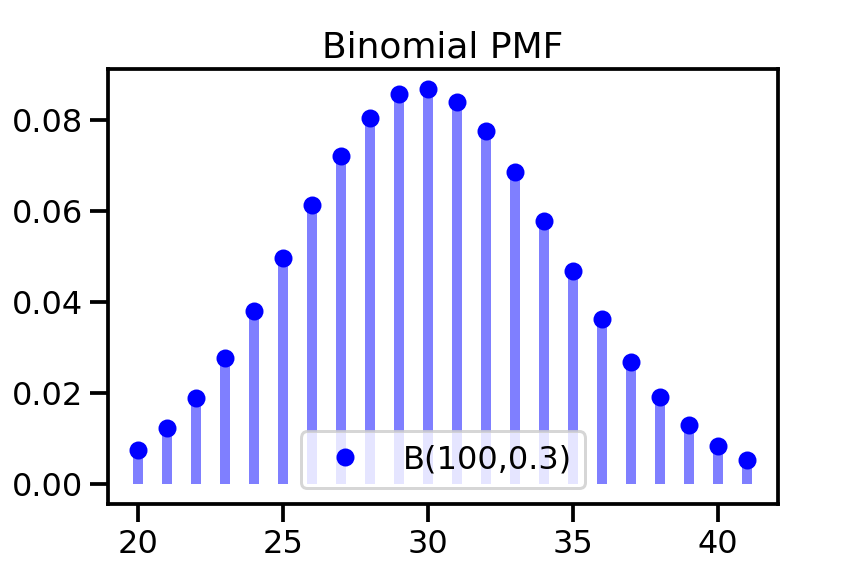

In [8]:
p = 0.3
n = 100
binom_rv = binom(n,p)

fig, ax = plt.subplots(1, 1)
p = 0.3

x = np.arange(binom.ppf(0.01, n,p),
               binom.ppf(0.99,n, p)+1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label="B("+str(n)+","+str(p)+")")
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.title("Binomial PMF")
ax.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


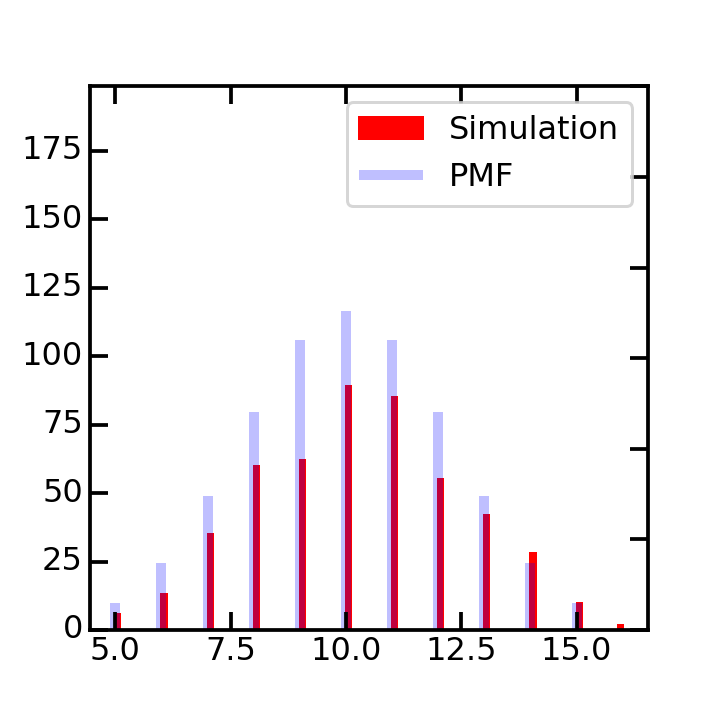

In [9]:
DISTR = binom(20, 0.5)
HIST_BINS = np.linspace(DISTR.ppf(0.01), DISTR.ppf(0.99)+1, 100)
data = DISTR.rvs(1000)
max_pdf = 0.3

fig = plt.figure(figsize = (5,5))
host = host_subplot(111, axes_class=AA.Axes)
par1 = host.twinx()
par1.set_ylim(top = max_pdf)

x = np.arange(DISTR.ppf(0.01), DISTR.ppf(0.99)+1)

par1.vlines(x, 0, DISTR.pmf(x), colors='b', lw=5, alpha=0.25,label='PMF')

n, _ = np.histogram(data, HIST_BINS)
_, _, bar_container = host.hist(data, HIST_BINS, lw=1,
                              ec="red", fc="red", alpha=1, label='Simulation')
plt.legend()
# 
# host.set_ylim(top=1)  # set safe limit to ensure that all data is visible.
ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()

### Распределение Пуассона (Poisson distribution)

$$ PMF(k) = e^{-\mu}\frac{\mu^k}{k!}$$

In [10]:
from scipy.stats import poisson
mu = 1.3
poisson_rv = poisson(mu)

<IPython.core.display.Javascript object>


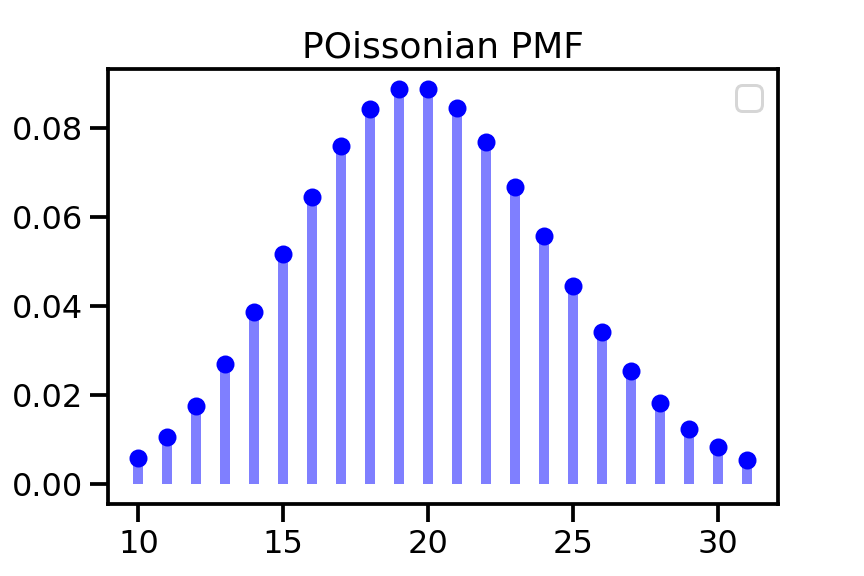

No handles with labels found to put in legend.


In [11]:
mu = 20
poisson_rv = poisson(mu)

fig, ax = plt.subplots(1, 1)

x = np.arange(poisson_rv.ppf(0.01),
               poisson_rv.ppf(0.99)+1)
ax.plot(x, poisson_rv.pmf(x), 'bo', ms=8)
ax.vlines(x, 0, poisson_rv.pmf(x), colors='b', lw=5, alpha=0.5)
plt.title("POissonian PMF")
ax.legend(loc='best')
plt.show()

## Непрерыврые распределения

### Нормальное/Гауссово распределение (Normal / Gaussian distribution)

$$ PDF(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [12]:
from scipy.stats import norm
mu=0 
sigma=1
norm_rv = norm(loc = mu,scale = sigma)

In [13]:
mean, var, skew, kurt = norm_rv.stats(moments='mvsk')
print(mean, var, skew, kurt)

0.0 1.0 0.0 0.0


<IPython.core.display.Javascript object>


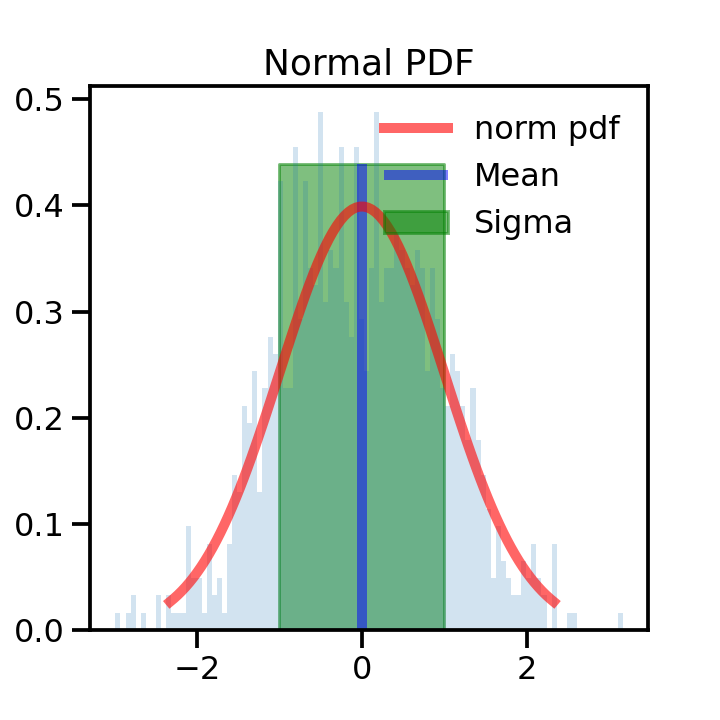

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))
x = np.linspace(norm_rv.ppf(0.01),
               norm_rv.ppf(0.99), 100)
ax.plot(x, norm_rv.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
r = norm_rv.rvs(size=1000)
ax.hist(norm_rv.rvs(size=1000), density=True, histtype='stepfilled', alpha=0.2, bins = 100)
ax.vlines(mu, 0, max(norm_rv.pdf(x))*1.1, colors='b', lw=5, alpha=0.5, label = "Mean")
ax.fill_between([mu-sigma,mu+sigma], 0, max(norm_rv.pdf(x))*1.1, 
                color='green', alpha=0.5, label = "Sigma")
plt.title("Normal PDF")
ax.legend(loc='best', frameon=False)
plt.show()




<IPython.core.display.Javascript object>


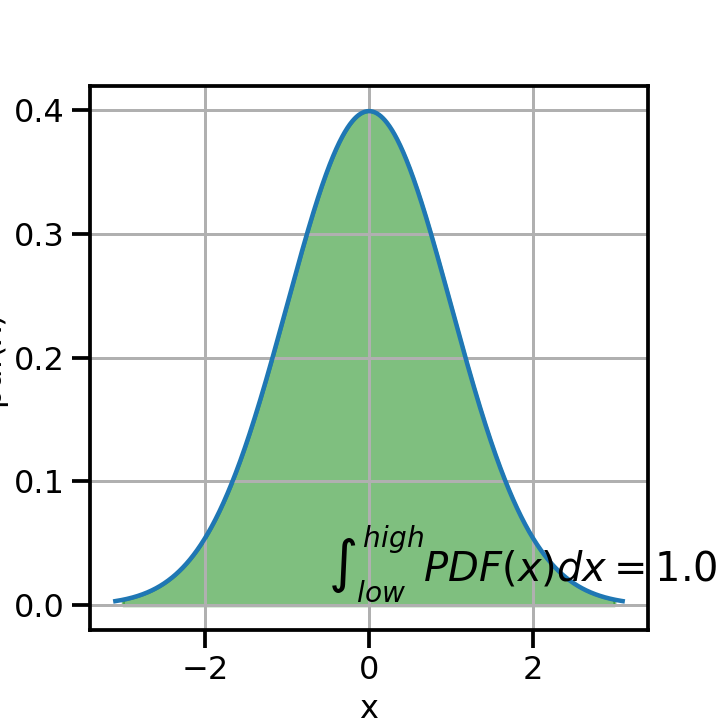

In [15]:
x_min = mu-3*sigma
x_max = mu+3*sigma

fig, ax = plt.subplots(figsize = (5,5))
# for distribution curve
x= np.linspace(norm_rv.ppf(0.001),
               norm_rv.ppf(0.999), 1000)
ax.plot(x, norm_rv.pdf(x))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(x_min,x_max,0.01)
# ax.set_ylim(0,0.25)
ax.fill_between(px,norm_rv.pdf(px),alpha=0.5, color='g')
pro=norm_rv.cdf(x_max) - norm_rv.cdf(x_min)
ax.text(-0.5,0.02,"$\int_{low}^{high}{PDF(x)dx} = $"+str(round(pro,2)), fontsize=20)
plt.show()

<IPython.core.display.Javascript object>


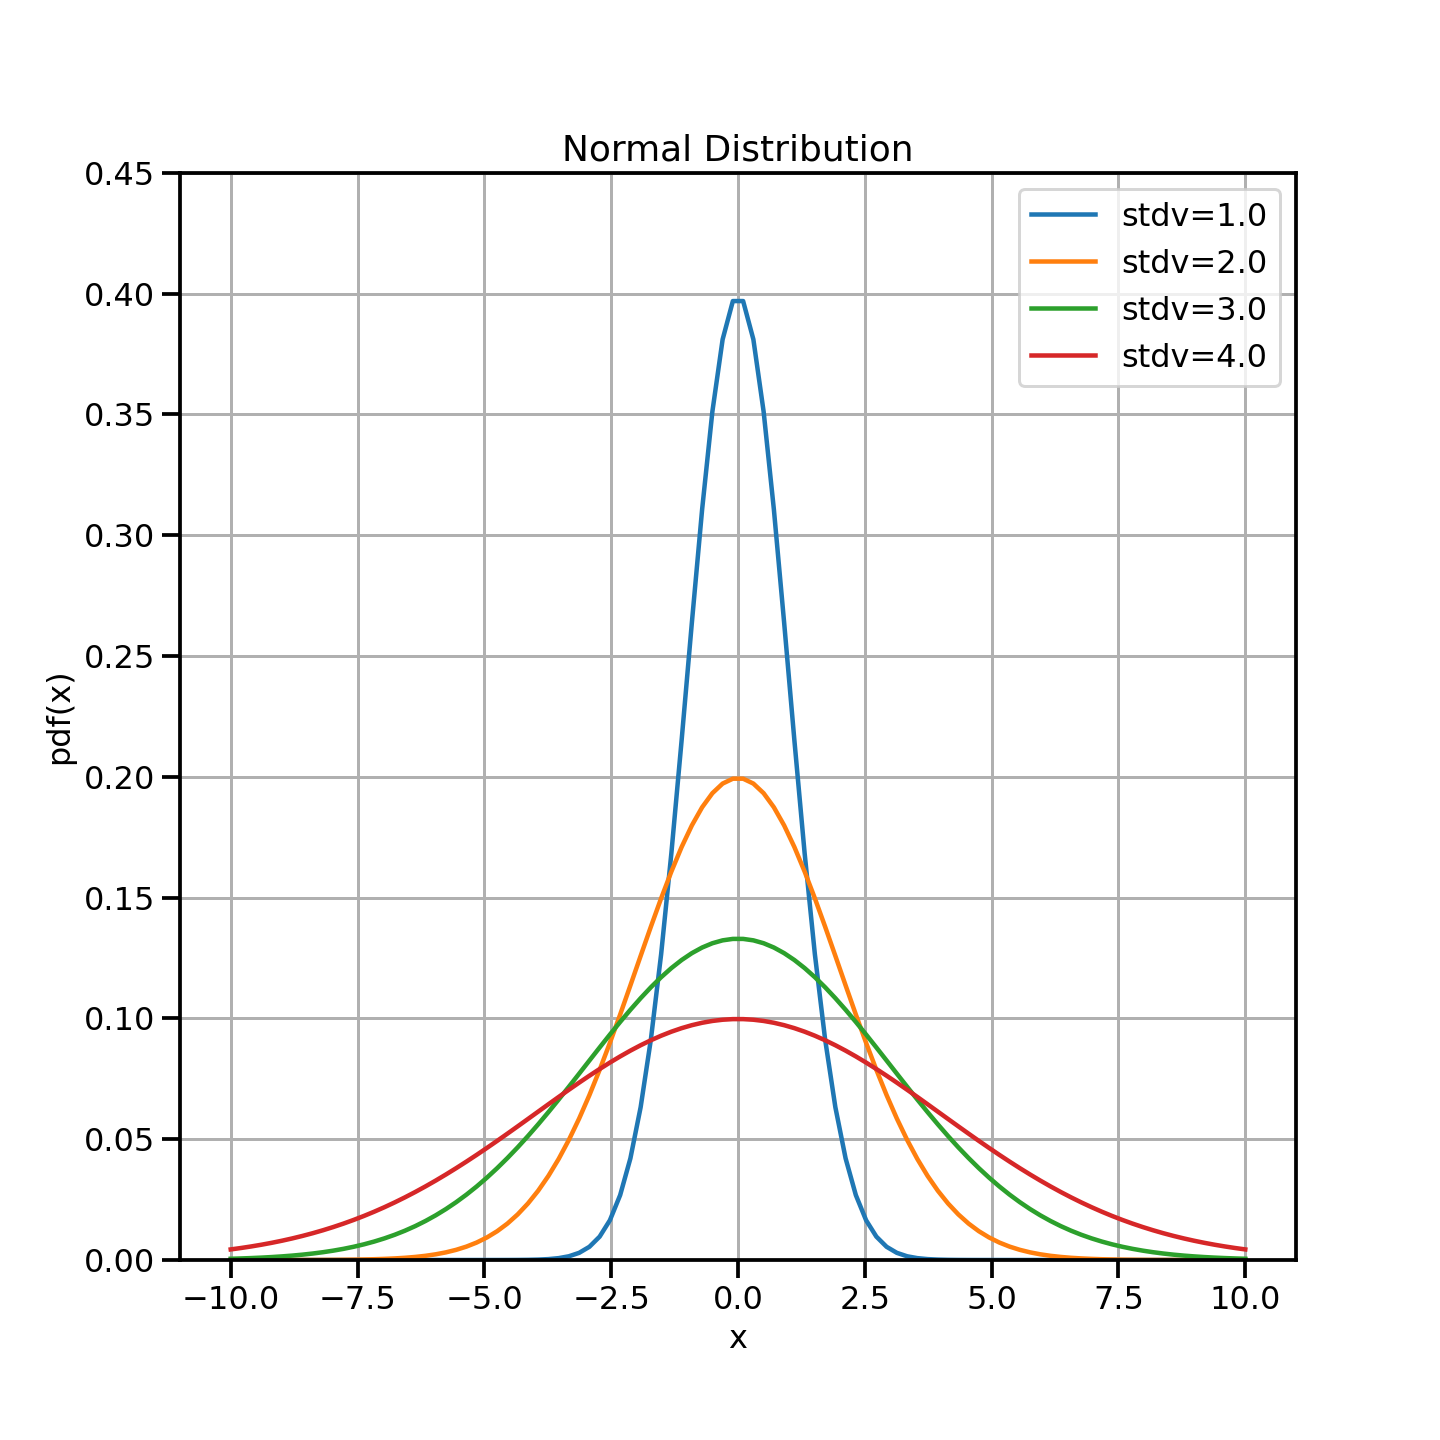

In [17]:
fig, ax = plt.subplots(figsize = (10,10))
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

### Распределение Стьюдента (Student t-distribution)

$$ PDF(x) \sim (1+x^2/\nu)^{-(\nu+1)/2} $$

In [18]:
from scipy.stats import t
df=5 
student_rv = t(df = 5)

<IPython.core.display.Javascript object>


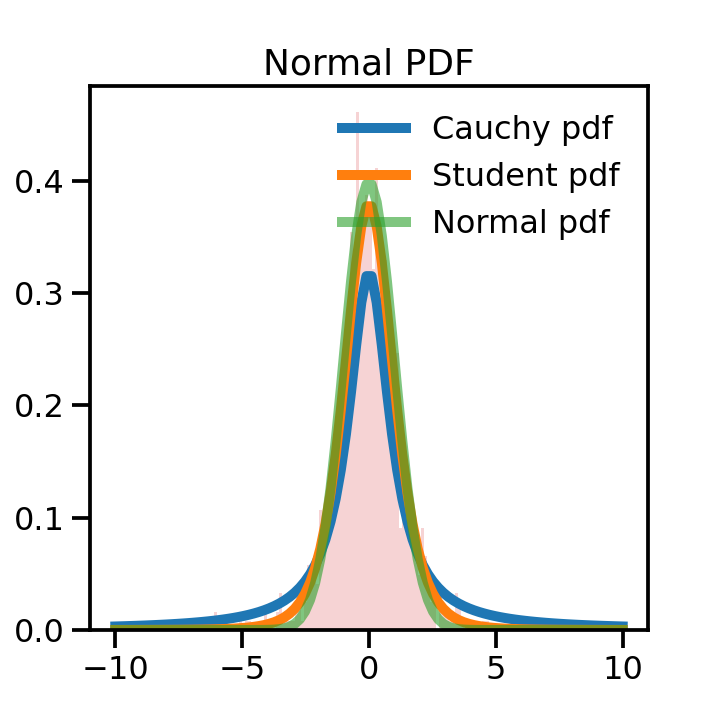

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))
x = np.linspace(-10,
               10, 100)
ax.plot(x, t(df = 1).pdf(x),
        '-', lw=5, alpha=1, label='Cauchy pdf')

ax.plot(x, student_rv.pdf(x),
        '-', lw=5, alpha=1, label='Student pdf')
ax.plot(x, norm_rv.pdf(x),
        '-', lw=5, alpha=0.6, label='Normal pdf')
r = student_rv.rvs(size=1000)
ax.hist(student_rv.rvs(size=1000), density=True, histtype='stepfilled', alpha=0.2, bins = 100)
plt.title("Normal PDF")
ax.legend(loc='best', frameon=False)
plt.show()




### Распределение Коши (Cauchy distribution)

$$ PDF(x) = \frac{1}{\pi(1+x^2)}$$

In [20]:
from scipy.stats import cauchy
cauchy_rv = cauchy()

### Распределение Лапласа (Laplace distribution / double-sided exponential)

$$PDF(x) = \frac{1}{2}e^{-|x|}$$

In [21]:
from scipy.stats import laplace
laplace_rv = laplace()

<IPython.core.display.Javascript object>


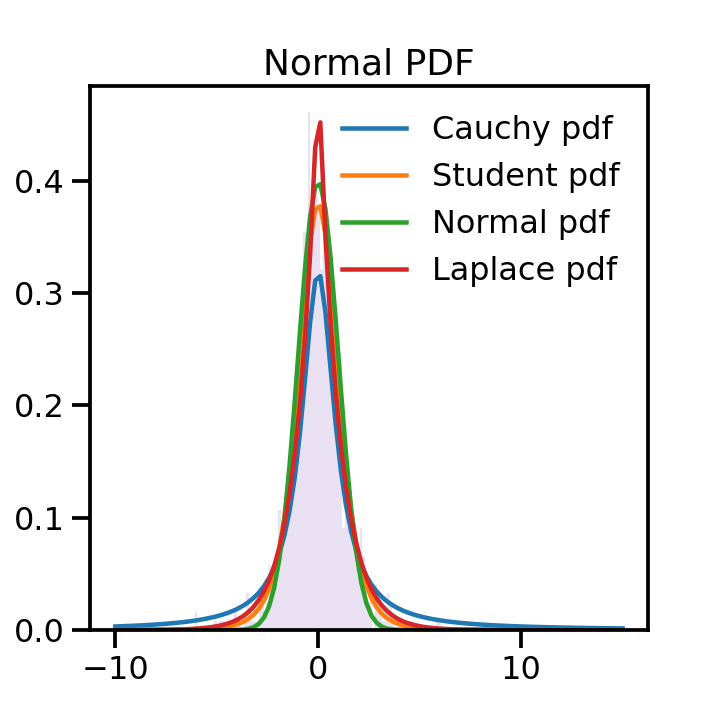

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))
x = np.linspace(-10,
               15, 100)
ax.plot(x, t(df = 1).pdf(x),
        '-', label='Cauchy pdf')
ax.plot(x, student_rv.pdf(x),
        '-', label='Student pdf')
ax.plot(x, norm_rv.pdf(x),
        '-', label='Normal pdf')
ax.plot(x, laplace_rv.pdf(x),
        '-', label='Laplace pdf')

r = student_rv.rvs(size=1000)
ax.hist(student_rv.rvs(size=1000), density=True, histtype='stepfilled', alpha=0.2, bins = 100)
plt.title("Normal PDF")
ax.legend(loc='best', frameon=False)
plt.show()




### Бета распределение (Beta distribution)

$$ PDF(x) \sim x^{a-1}(1-x)^{b-1} $$

In [23]:
from scipy.stats import beta
a = 2
b = 2
beta_rv = beta(a,b)

<IPython.core.display.Javascript object>


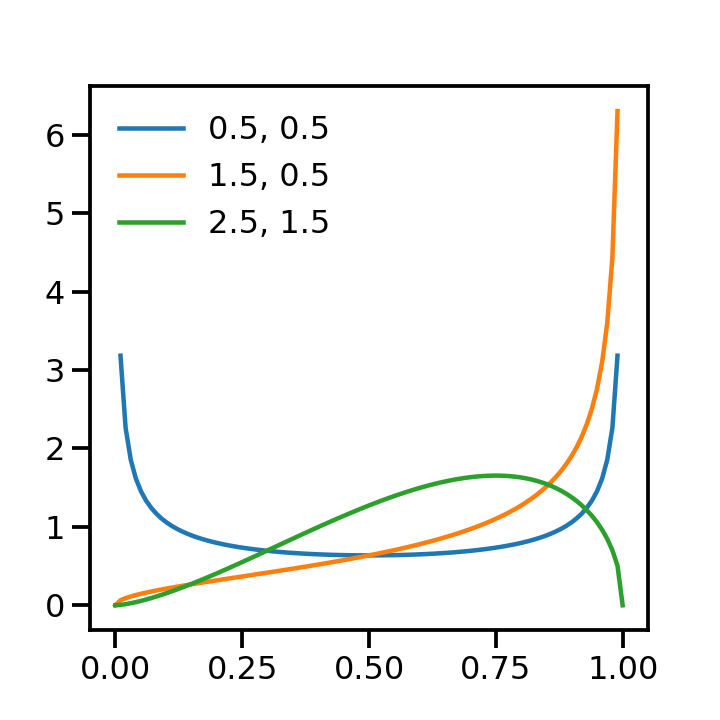

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))
x = np.linspace(-0,
                1., 100)
ax.plot(x, beta(0.5,0.5).pdf(x),
        '-', label='0.5, 0.5')
ax.plot(x, beta(1.5,0.5).pdf(x),
        '-', label='1.5, 0.5')
ax.plot(x, beta(2.5,1.5).pdf(x),
        '-', label='2.5, 1.5')
ax.legend(loc='best', frameon=False)
plt.show()




### Гамма распределение (Gamma distribution)

$$ PDF(x)\sim x^{a-1}e^{-x} $$

In [25]:
from scipy.stats import gamma
a = 2
gamma_rv = gamma(a)

<IPython.core.display.Javascript object>


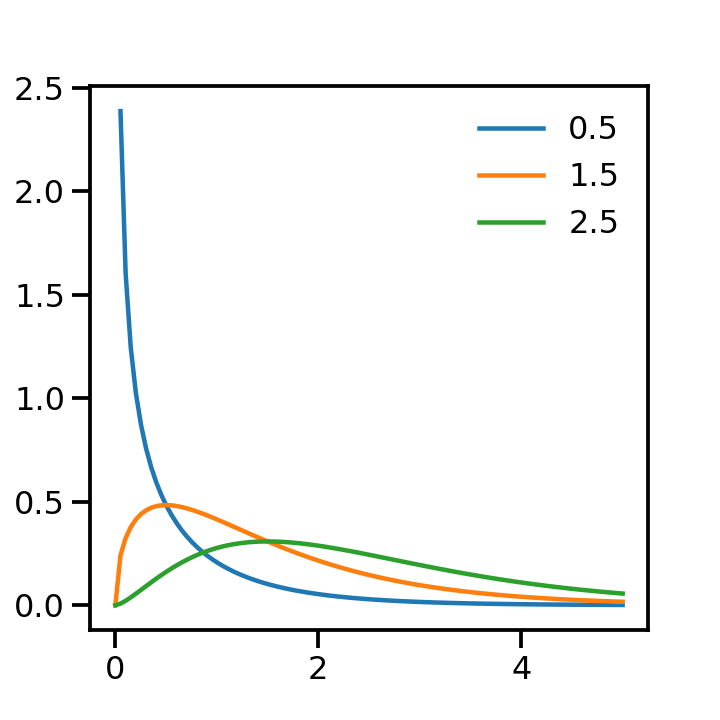

In [26]:
from scipy.stats import gamma
a = 2
gamma_rv = gamma(a)

fig, ax = plt.subplots(1, 1, figsize = (5,5))
x = np.linspace(-0,
                5., 100)
ax.plot(x, gamma(0.5).pdf(x),
        '-', label='0.5')
ax.plot(x, gamma(1.5).pdf(x),
        '-', label='1.5')
ax.plot(x, gamma(2.5).pdf(x),
        '-', label='2.5')
ax.legend(loc='best', frameon=False)
plt.show()




### Равномерное распределение (Uniform distribution)

In [27]:
from scipy.stats import uniform
lower_limit = 0
upper_limit = 1
uniform_rv = uniform(loc = lower_limit, scale = upper_limit )

## Преобразование распределений

Как найти распределение значений функции $f(x)$ от случайной величины $x$ распределенной по закону $p(x)$?

### Дискретный случай

<IPython.core.display.Javascript object>


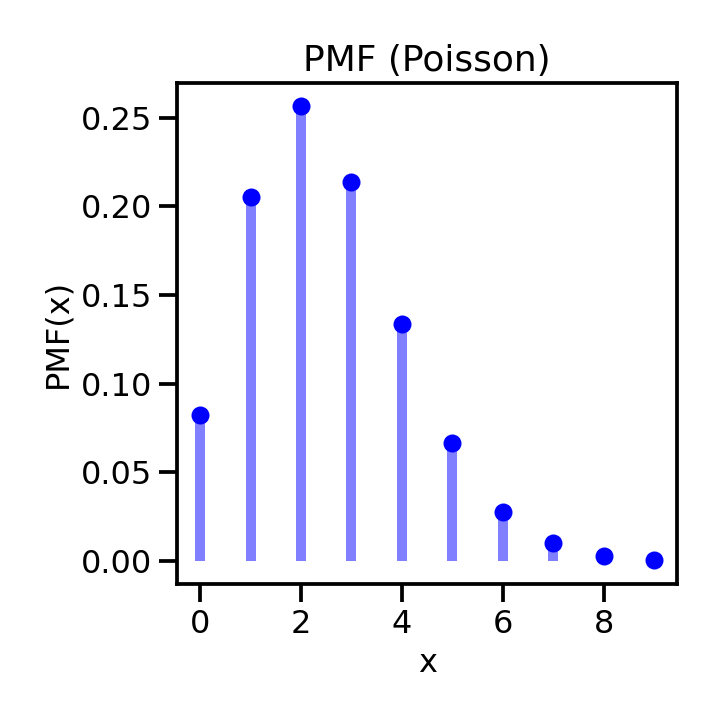

In [28]:
x_rv = poisson(2.5)

fig, ax = plt.subplots(1, 1,figsize = (5,5))

x = np.arange(0, 10)
ax.plot(x, x_rv.pmf(x), 'bo', ms=8)
ax.vlines(x, 0, x_rv.pmf(x), colors='b', lw=5, alpha=0.5)
plt.title("PMF (Poisson)")
plt.xlabel("x")
plt.ylabel("PMF(x)")
# ax.legend(loc='best')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


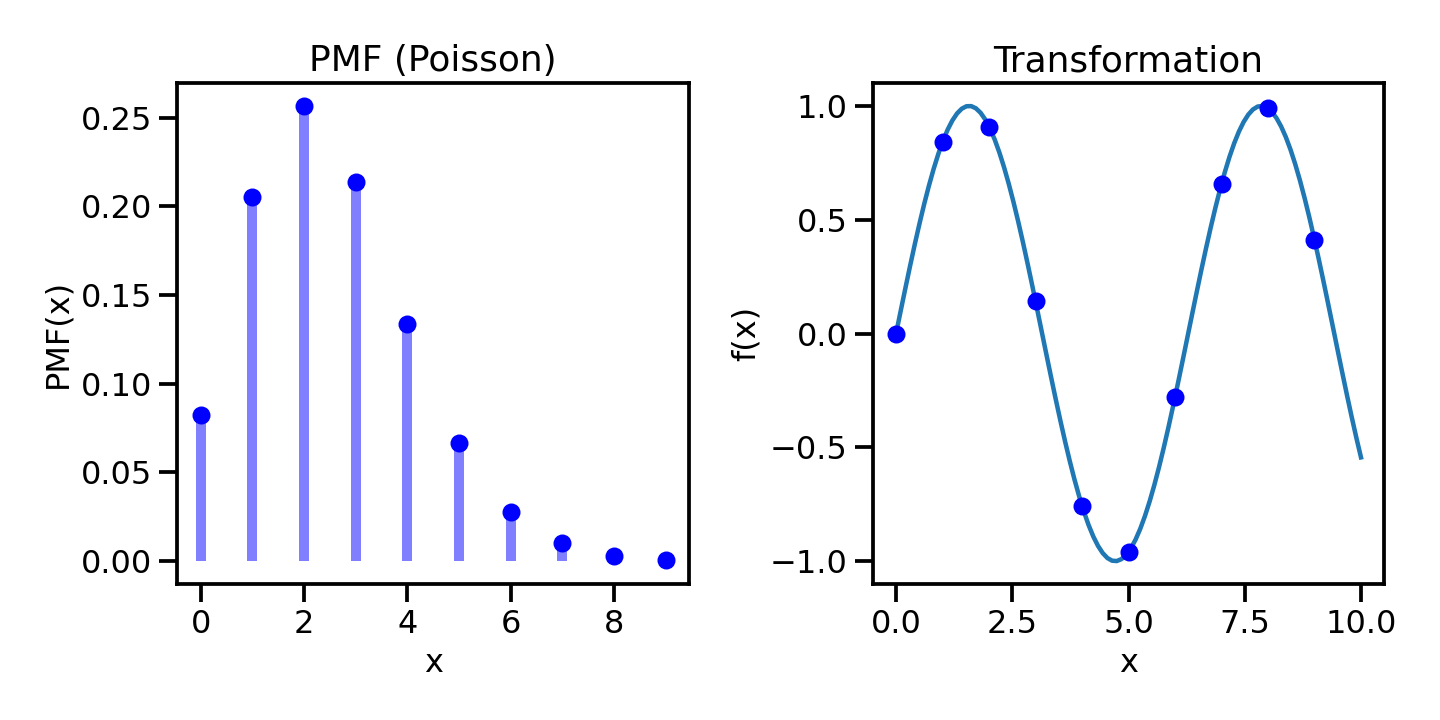

In [29]:
func = lambda x: np.sin(x)

fig, ax = plt.subplots(1, 2,figsize = (10,5))
ax[0]
ax[0].plot(x, x_rv.pmf(x), 'bo', ms=8)
ax[0].vlines(x, 0, x_rv.pmf(x), colors='b', lw=5, alpha=0.5)
ax[0].set_title("PMF (Poisson)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PMF(x)")
ax[1]
x_s = np.linspace(0, 10, 100)
ax[1].plot(x_s, func(x_s))
ax[1].plot(x, func(x), 'bo', ms=8)
ax[1].set_title("Transformation")
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
df = pd.DataFrame(data=np.array([x, x_rv.pmf(x)]).T, columns=["x", "prob"])

In [34]:
df

,x,prob
0,0.0,0.082085
1,1.0,0.205212
2,2.0,0.256516
3,3.0,0.213763
4,4.0,0.133602
5,5.0,0.066801
6,6.0,0.027834
7,7.0,0.009941
8,8.0,0.003106
9,9.0,0.000863


In [35]:
df['y'] = func(df['x'])

In [36]:
df = df.groupby('y').sum()

In [37]:
df.prob.sum()

0.9997226479053792

<IPython.core.display.Javascript object>


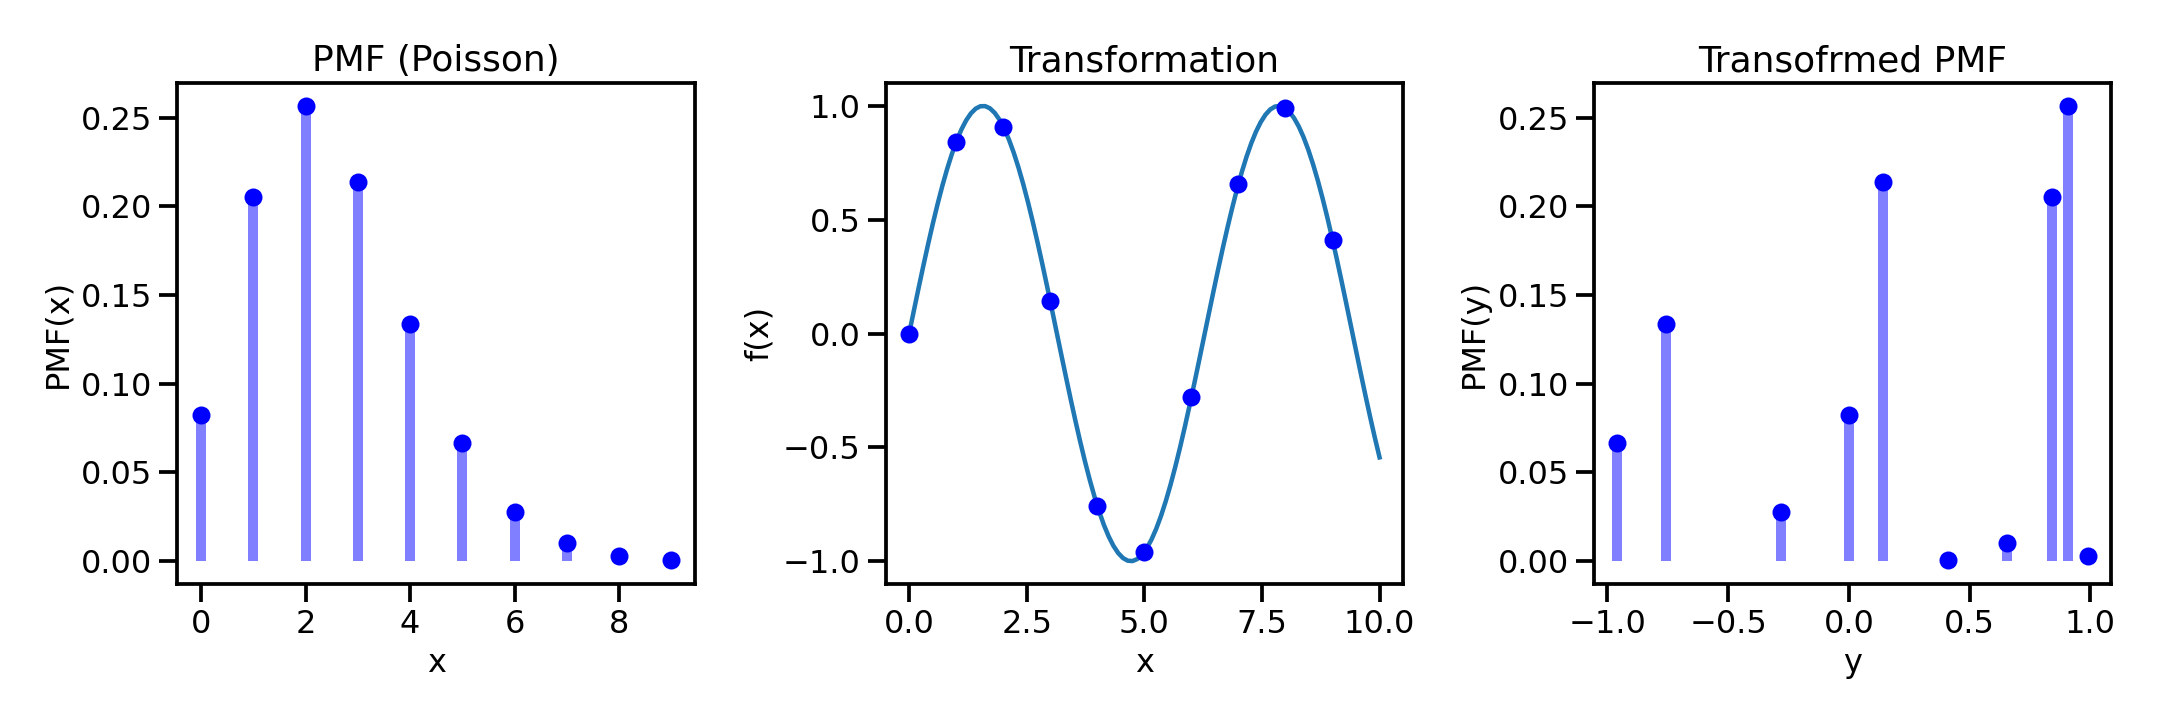

In [38]:

fig, ax = plt.subplots(1, 3,figsize = (15,5))
ax[0]
ax[0].plot(x, x_rv.pmf(x), 'bo', ms=8)
ax[0].vlines(x, 0, x_rv.pmf(x), colors='b', lw=5, alpha=0.5)
ax[0].set_title("PMF (Poisson)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PMF(x)")
ax[1]
x_s = np.linspace(0, 10, 100)
ax[1].plot(x_s, func(x_s))
ax[1].plot(x, func(x), 'bo', ms=8)
ax[1].set_title("Transformation")
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")

ax[2]
ax[2].plot(df.index.values, df.prob.values, 'bo', ms=8)
ax[2].vlines(df.index.values, 0, df.prob.values, colors='b', lw=5, alpha=0.5)
ax[2].set_title("Transofrmed PMF")
ax[2].set_xlabel("y")
ax[2].set_ylabel("PMF(y)")
# ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Общий случай

$$ CDF(y) = Pr(f(X)<y) = Pr(X \in \{x|f(x)\leq y\}) $$

<IPython.core.display.Javascript object>


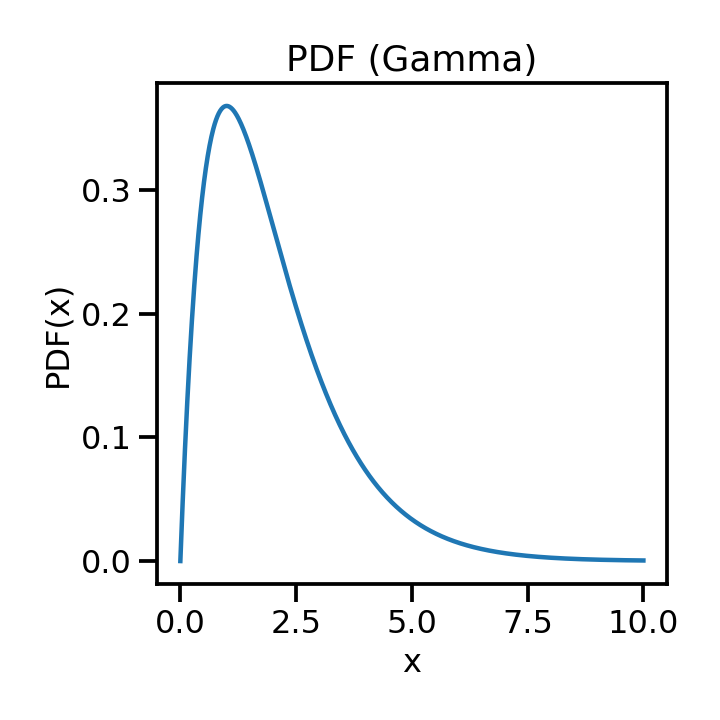

In [39]:
x_rv = gamma(2)

fig, ax = plt.subplots(1, 1,figsize = (5,5))

x = np.linspace(0, 10, 1000)
ax.plot(x, x_rv.pdf(x))
plt.title("PDF (Gamma)")
plt.xlabel("x")
plt.ylabel("PDF(x)")
# ax.legend(loc='best')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


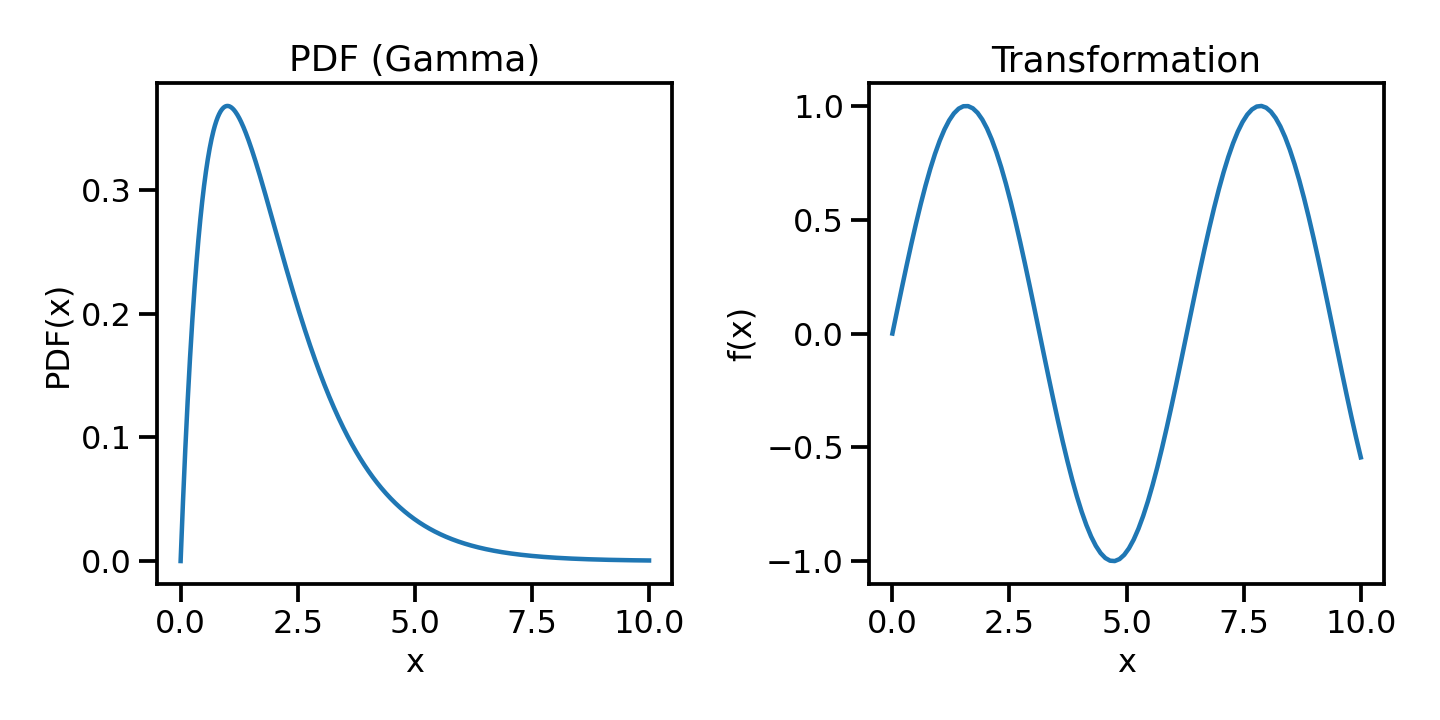

In [40]:
func = lambda x: np.sin(x)

fig, ax = plt.subplots(1, 2,figsize = (10,5))
ax[0]
ax[0].plot(x, x_rv.pdf(x))
ax[0].set_title("PDF (Gamma)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PDF(x)")
ax[1]
x_s = np.linspace(0, 10, 100)
ax[1].plot(x_s, func(x_s))
# ax[1].plot(x, func(x), 'bo', ms=8)
ax[1].set_title("Transformation")
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")
plt.tight_layout()
plt.show()



In [41]:
df = pd.DataFrame(data=np.array([x, x_rv.pdf(x)]).T, columns=["x", "prob"])
df['y'] = func(df['x'])

In [42]:
df = df.sort_values('y',ascending = True)

In [43]:
df['cdf'] = df['prob'].cumsum()/df.prob.sum()

<IPython.core.display.Javascript object>


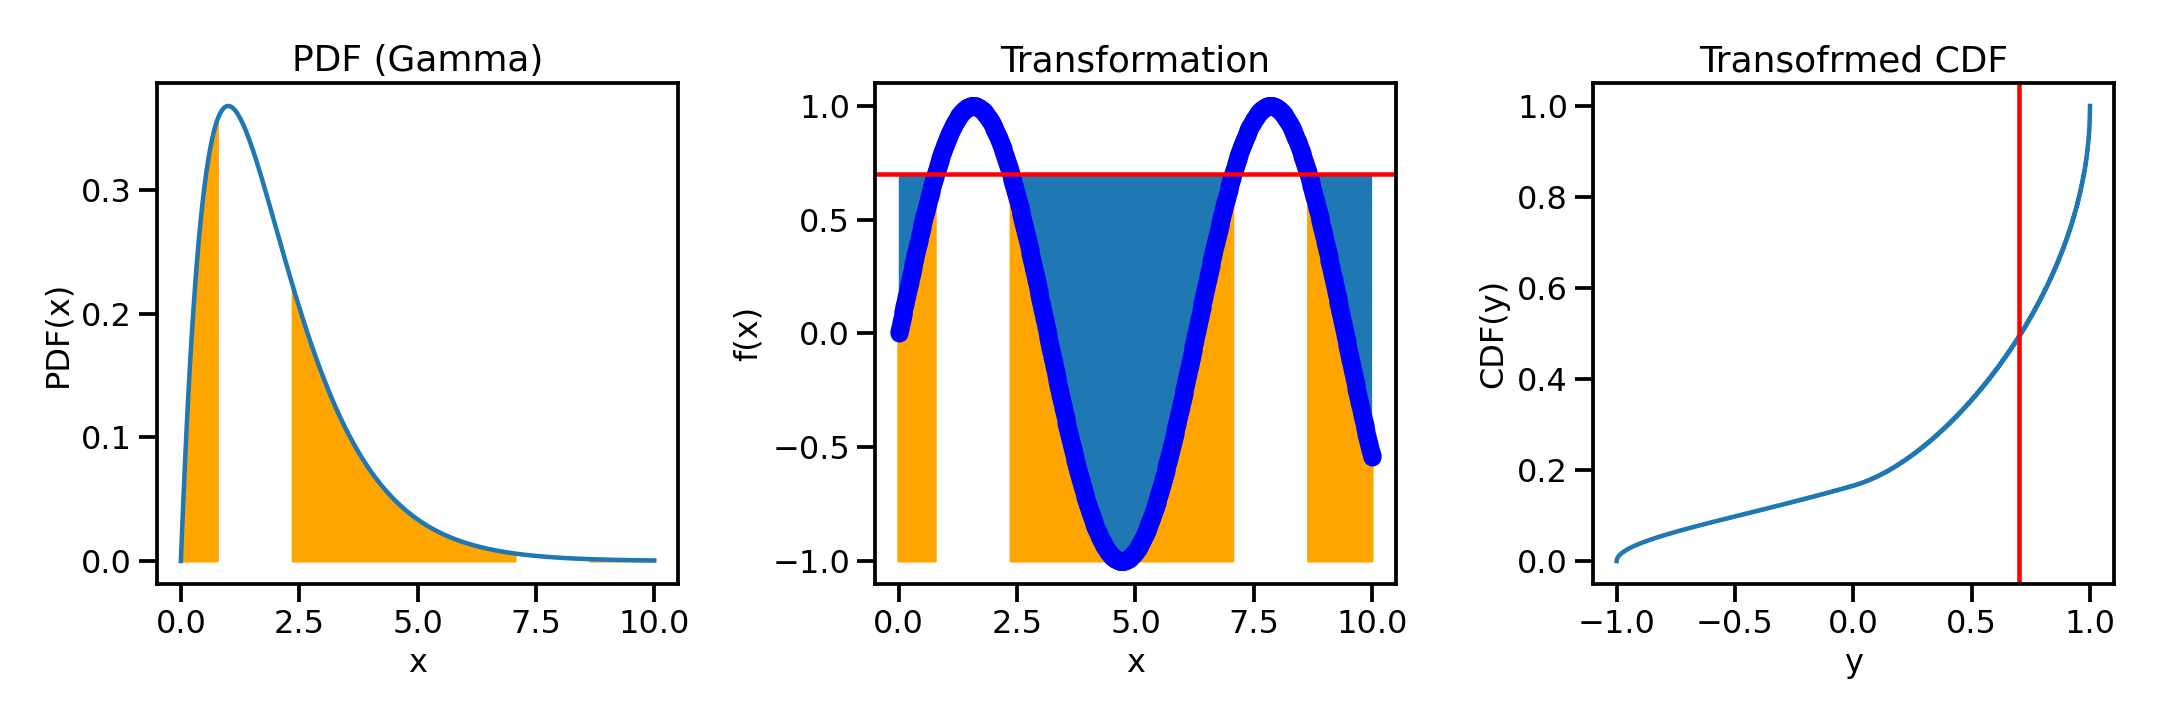

In [44]:
cdf_at = 0.7

fig, ax = plt.subplots(1, 3,figsize = (15,5))
ax[0]
ax[0].plot(x, x_rv.pdf(x))
ax[0].fill_between(x, 0, x_rv.pdf(x), where = (func(x)<cdf_at), color = "orange")
ax[0].set_title("PDF (Gamma)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PDF(x)")
ax[1]
x_s = np.linspace(0, 10, 100)
ax[1].plot(x_s, func(x_s))
ax[1].plot(x, func(x), 'bo', ms=8)
ax[1].axhline(cdf_at, color = 'red')
ax[1].fill_between(x, func(x), np.maximum(func(x), cdf_at))
ax[1].fill_between(x, -1, func(x), where = (func(x)<cdf_at), color = "orange")
ax[1].set_title("Transformation")
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")

ax[2]
ax[2].plot(df.y.values, df.cdf.values)
ax[2].axvline(cdf_at, color = 'red')
ax[2].set_title("Transofrmed CDF")
ax[2].set_xlabel("y")
ax[2].set_ylabel("CDF(y)")
# ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Монотонные распределения

### Свертка распределений

Свертка с помошью Фурье преобразований:
$$ r(x) \equiv g(x)\circledast f(x) = \mathcal{F}^{-1}\{\mathcal{G}\times\mathcal{H}\} $$

<IPython.core.display.Javascript object>


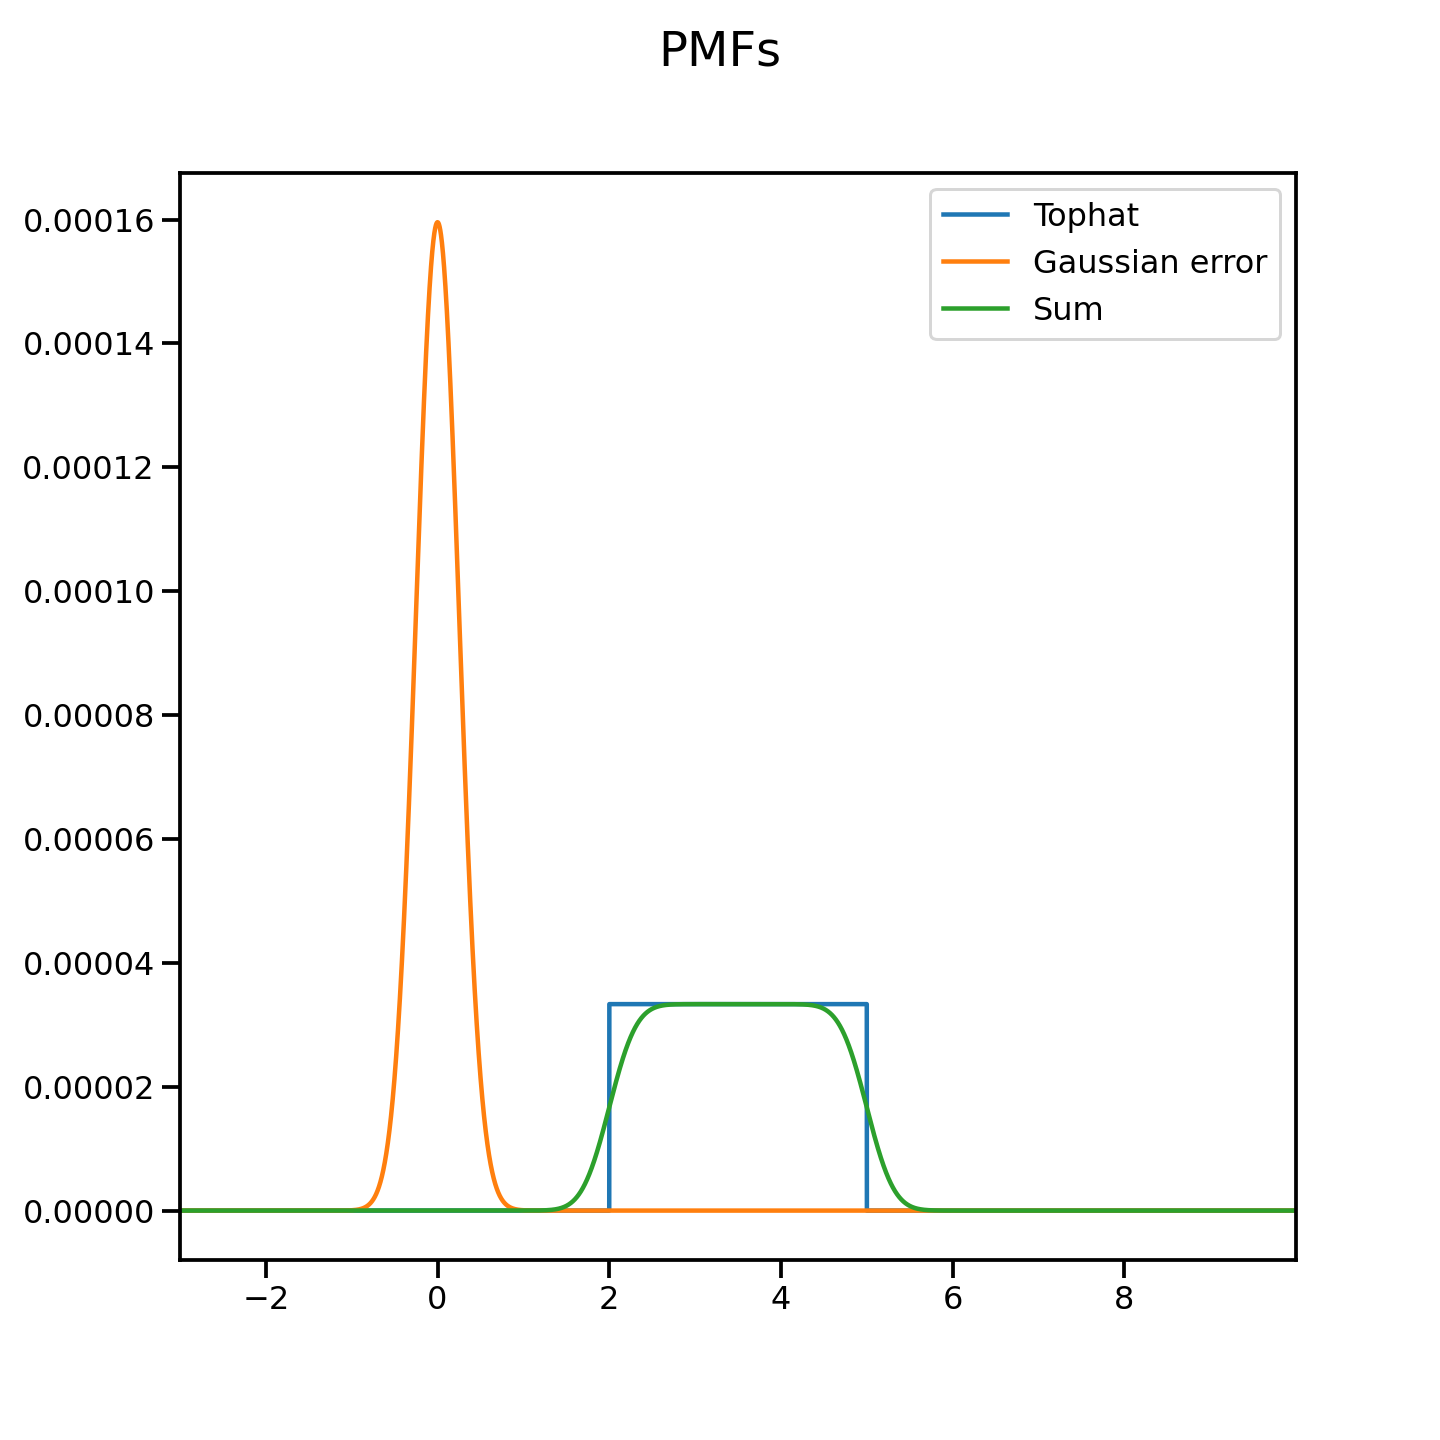

In [47]:
from scipy.interpolate import interp1d
from scipy import signal


simple = uniform(loc=2,scale=3)
errscale = 0.25
err = norm(loc=0,scale=errscale)

delta = 1e-4
big_grid = np.arange(-10,10,delta)

pmf1 = simple.pdf(big_grid)*delta
pmf2 = err.pdf(big_grid)*delta
conv_pmf = signal.fftconvolve(pmf1,pmf2,'same') # Convolved probability mass function
conv_pmf = conv_pmf/sum(conv_pmf)

fig = plt.figure(figsize = (10,10))
plt.plot(big_grid,pmf1, label='Tophat')
plt.plot(big_grid,pmf2, label='Gaussian error')
plt.plot(big_grid,conv_pmf, label='Sum')
plt.xlim(-3,max(big_grid))
plt.legend(loc='best'), plt.suptitle('PMFs')
plt.show()

In [48]:
from scipy import misc
face = misc.face(gray=True)
kernel = np.outer(signal.windows.gaussian(70, 8),
                  signal.windows.gaussian(70, 8))
blurred = signal.fftconvolve(face, kernel, mode='same')

<IPython.core.display.Javascript object>


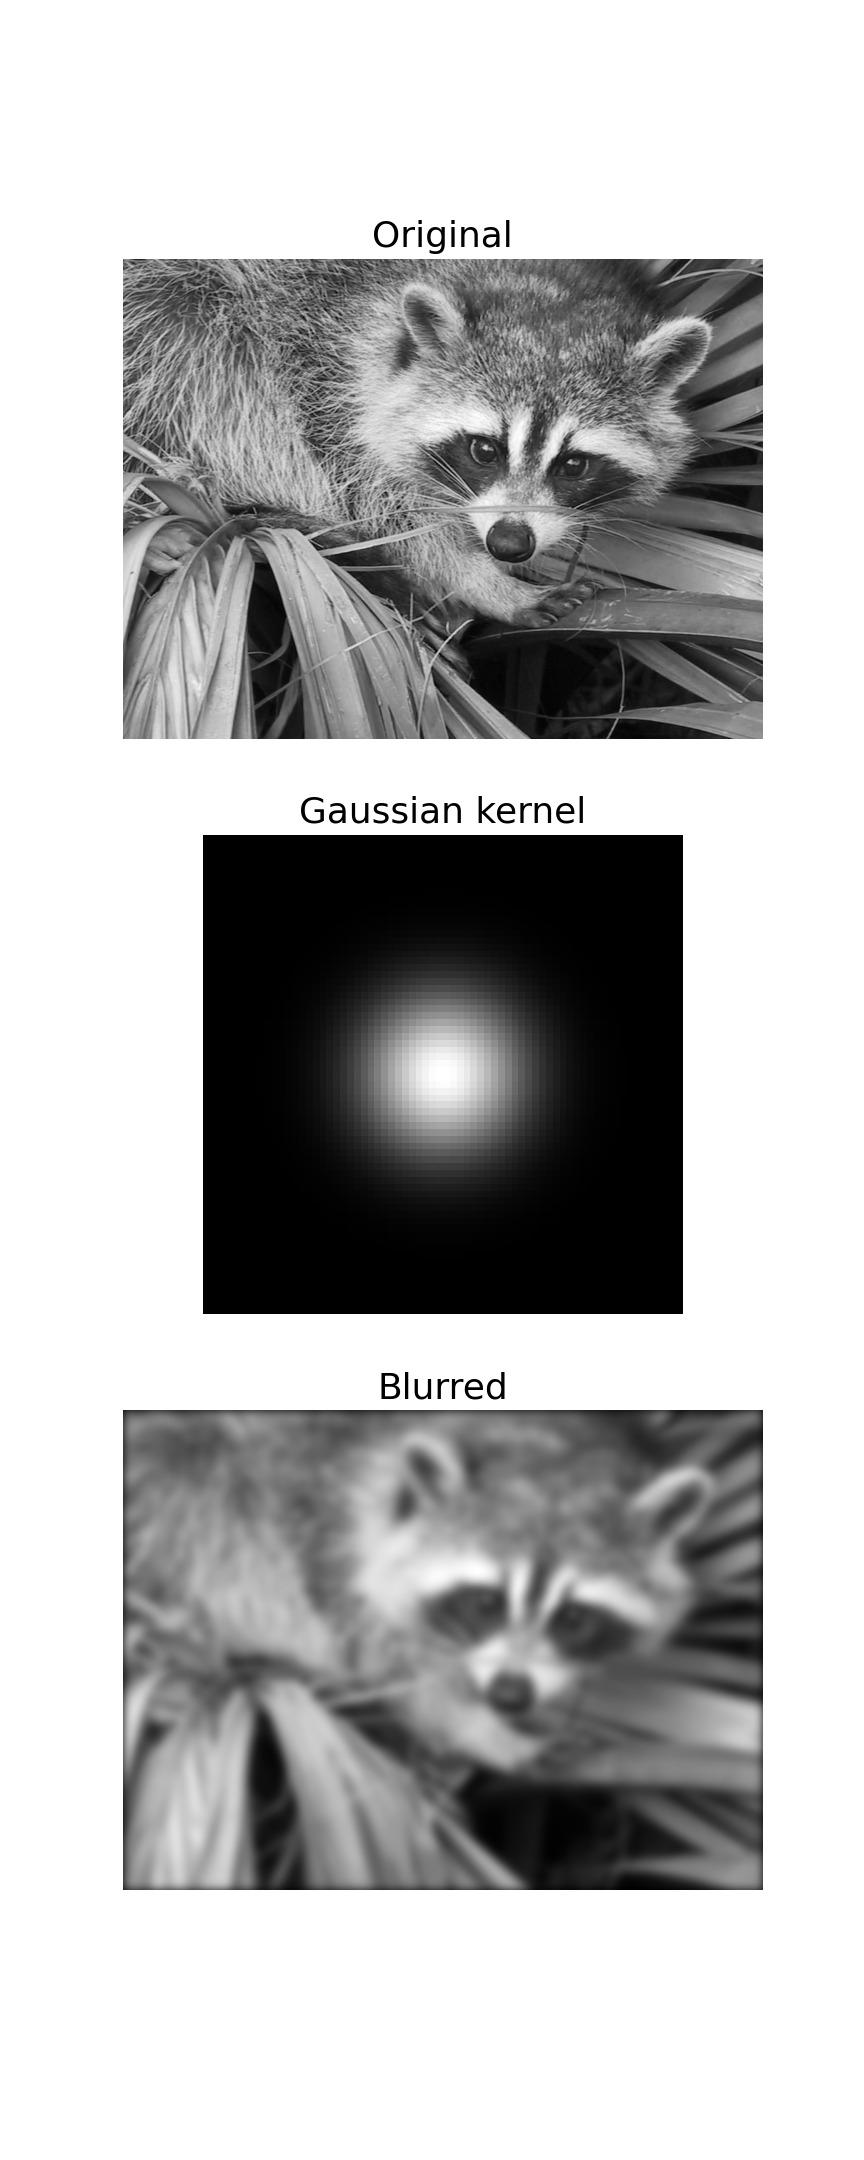

In [49]:
fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(3, 1,
                                                     figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_kernel.imshow(kernel, cmap='gray')
ax_kernel.set_title('Gaussian kernel')
ax_kernel.set_axis_off()
ax_blurred.imshow(blurred, cmap='gray')
ax_blurred.set_title('Blurred')
ax_blurred.set_axis_off()
fig.show()

## Центральная предельная теорема

## Монте-Карло симуляция

/var/folders/4d/p4k6dmfn5kv_wb1hnw_9mcc80000gq/T/ipykernel_74631/2345214698.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1,figsize = (5,5))


<IPython.core.display.Javascript object>


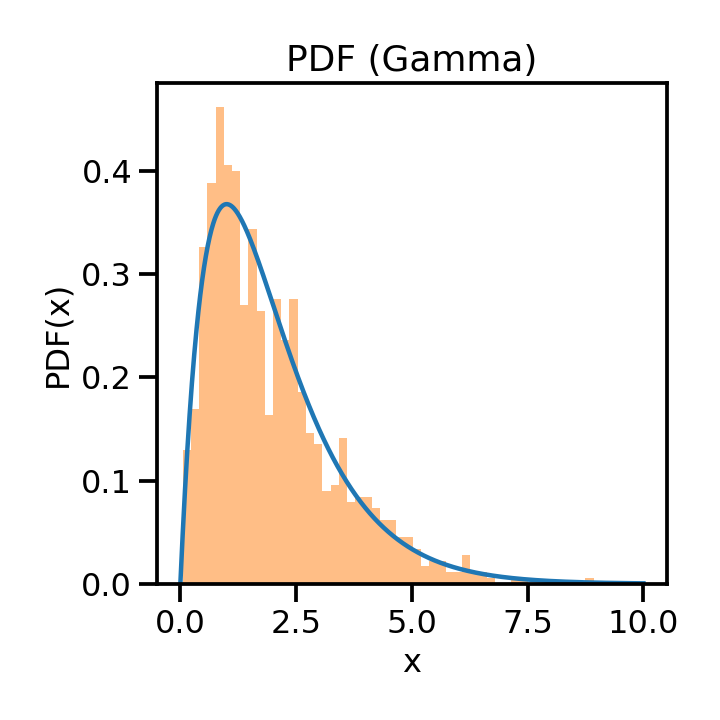

In [50]:
x_rv = gamma(2)
x_sample = x_rv.rvs(1000)

fig, ax = plt.subplots(1, 1,figsize = (5,5))

x = np.linspace(0, 10, 1000)
ax.plot(x, x_rv.pdf(x))
ax.hist(x_sample, bins = 50, density = True, alpha = 0.5)
plt.title("PDF (Gamma)")
plt.xlabel("x")
plt.ylabel("PDF(x)")
# ax.legend(loc='best')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


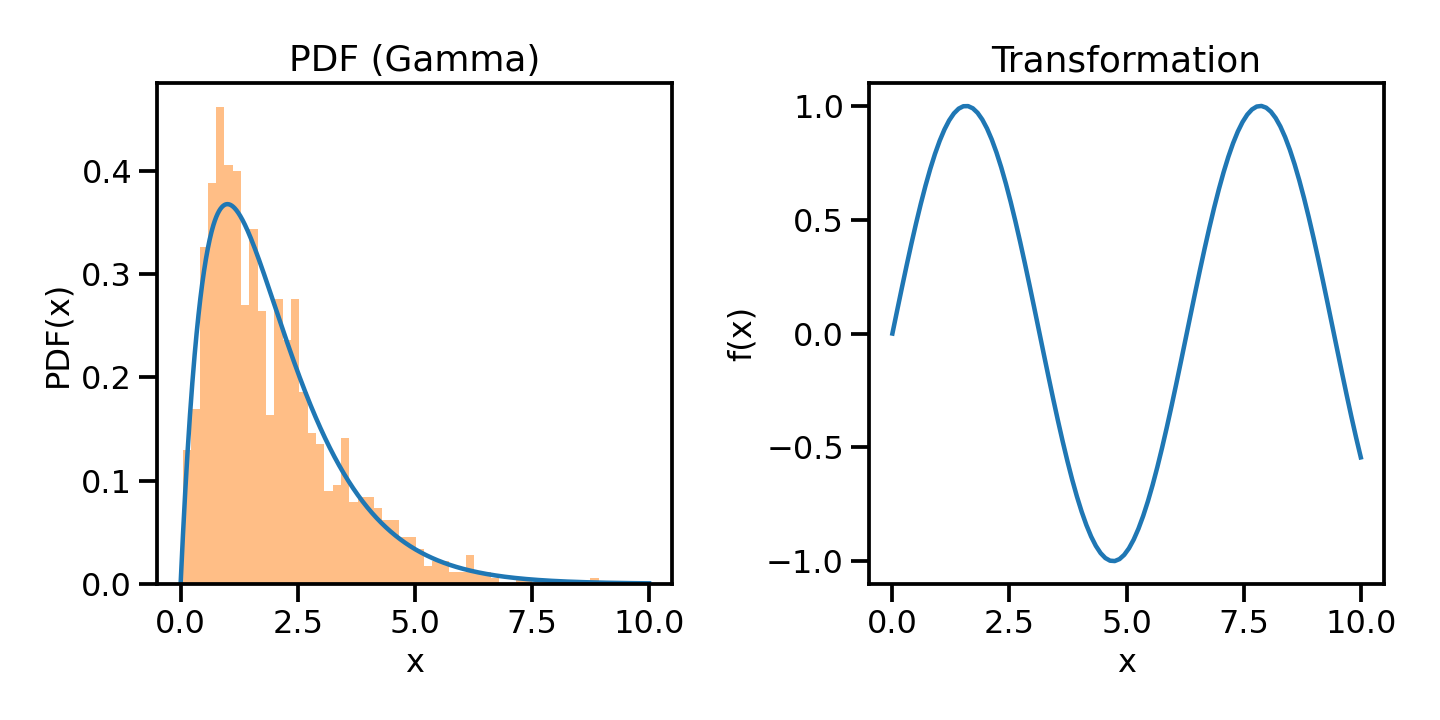

In [51]:
func = lambda x: np.sin(x)

fig, ax = plt.subplots(1, 2,figsize = (10,5))
ax[0]
ax[0].plot(x, x_rv.pdf(x))
ax[0].hist(x_sample, bins = 50, density = True, alpha = 0.5)
ax[0].set_title("PDF (Gamma)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PDF(x)")
ax[1]
x_s = np.linspace(0, 10, 100)
ax[1].plot(x_s, func(x_s))
# ax[1].plot(x, func(x), 'bo', ms=8)
ax[1].set_title("Transformation")
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")
plt.tight_layout()
plt.show()




In [55]:
y_sample = func(x_sample)

In [56]:
df = pd.DataFrame(data=np.array([x, x_rv.pdf(x)]).T, columns=["x", "prob"])
df['y'] = func(df['x'])
df = df.sort_values('y',ascending = True)
df['y_bin'] = pd.cut(df['y'], np.linspace(-1, 1, 102), labels = False)/50-1
df = df.groupby('y_bin').sum().reset_index()


<IPython.core.display.Javascript object>


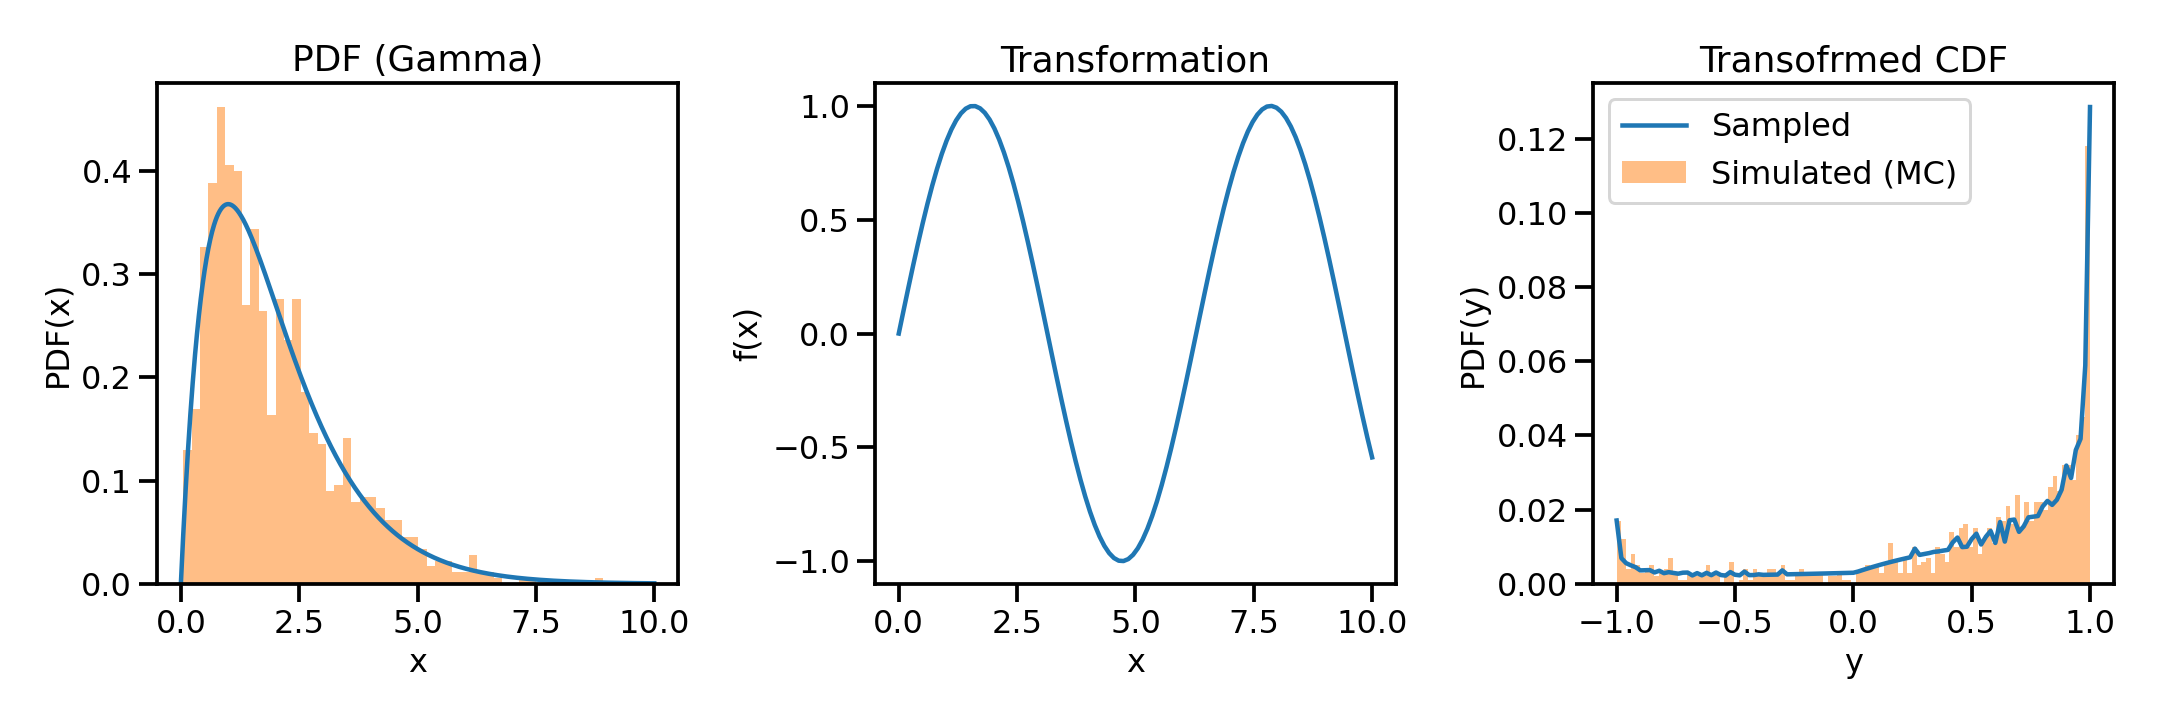

In [57]:


fig, ax = plt.subplots(1, 3,figsize = (15,5))
ax[0]
ax[0].plot(x, x_rv.pdf(x))
ax[0].hist(x_sample, bins = 50, density = True, alpha = 0.5)
ax[0].set_title("PDF (Gamma)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("PDF(x)")
ax[1]
x_s = np.linspace(0, 10, 100)
ax[1].plot(x_s, func(x_s))
ax[1].set_title("Transformation")
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")

ax[2]
ax[2].plot(df.y_bin.values, df.prob.values/df.prob.sum(), label = "Sampled" )
a = ax[2].hist(y_sample, bins = 101, weights = 1./len(y_sample)*np.ones(len(y_sample)), alpha = 0.5, label = "Simulated (MC)")
ax[2].set_title("Transofrmed CDF")
ax[2].set_xlabel("y")
ax[2].set_ylabel("PDF(y)")
ax[2].legend(loc='best')
plt.tight_layout()
plt.show()

In [58]:
sum(a[0])

1.0000000000000007